In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [33]:
import math
N = len(dataset.index)
d = len(dataset.columns)
ads_selected = []
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d
total_reward = 0

for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i]/numbers_of_selections[i]
            delta = math.sqrt((3/2)*(math.log(n+1)/numbers_of_selections[i]))
            upper_bound = average_reward + delta
        else:
            upper_bound = 1e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n,ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

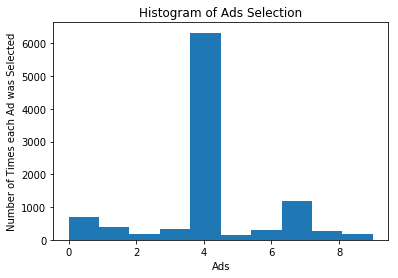

In [34]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selection')
plt.xlabel('Ads')
plt.ylabel('Number of Times each Ad was Selected')
plt.show()